In [21]:
from time import sleep, time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process import GaussianProcessRegressor
from bayes_opt import BayesianOptimization, UtilityFunction

    
def ackley(x, y):
    sleep(np.sqrt(x**2 + y**2) / 10)
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

def rosenbrock(x, y):
    sleep(np.sqrt(x**2 + y**3) / 10)
    return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2

def rastrigin(x, y):
    sleep((x + y**2 + x*y)/10)
    return 20 + x ** 2 - 10 * np.cos(2 * np.pi * x) + y ** 2 - 10 * np.cos(2 * np.pi * y)

    

Maximum Found: -12.795489431503759
Maximum Found: -11.663893324902077
Maximum Found: -8.03268848389061
Maximum Found: -7.3855099979389855
Maximum Found: -5.404436976414246
Maximum Found: -4.044737998606426
Maximum Found: -3.140561161216894
Maximum Found: -3.077835196225415
Maximum Found: -0.7352341331146341
Maximum Found: -0.1342028954873875
Maximum Found: -0.028174992288342082
Total Points Tested: 58


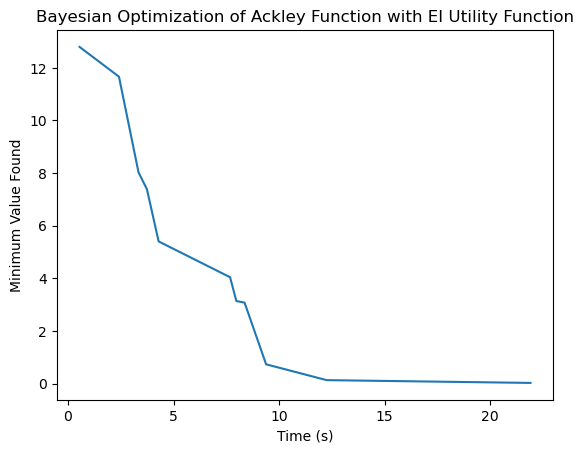

In [24]:
bounds = {'x': (-5, 5), 'y': (-5, 5)}
current_optimizing_fun = lambda x, y: -1 * ackley(x, y)

optimizer = BayesianOptimization(
    f=current_optimizing_fun,
    pbounds=bounds
)

utility = UtilityFunction(kind="ei", kappa=2.5, xi=0.0)
max_point = -1 * np.inf
max_points = []
max_points_time = []
start_time = time()
num_points_tested = 0
while time() - start_time < 30:
    num_points_tested += 1
    next_point_to_probe = optimizer.suggest(utility)
    result = current_optimizing_fun(**next_point_to_probe)
    if result > max_point:
        max_point = result
        max_points.append(-1 * max_point)
        max_points_time.append(time() - start_time)
        print(f"Maximum Found: {max_point}")
    optimizer.register(params=next_point_to_probe, target=result)
print(f"Total Points Tested: {num_points_tested}")

plt.plot(max_points_time, max_points)
plt.title("Bayesian Optimization of Ackley Function with EI Utility Function")
plt.xlabel("Time (s)")
plt.ylabel("Minimum Value Found")
plt.show()

